<a href="https://colab.research.google.com/github/efh32/TensorFlow-practice/blob/master/3d_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import tensorflow.keras as k
import tensorflow.keras.layers as kl
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.manifold import TSNE 

In [ ]:
data1, label1 = make_classification(n_samples=1000, n_features = 3, n_redundant=0)

In [ ]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(data1, label1, test_size = 0.3)

In [ ]:
c1 = X_train1[y_train1==0]
c2 = X_train1[y_train1==1]

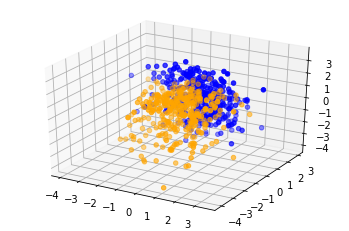

In [ ]:
ax = plt.axes(projection='3d')
ax.scatter(c1[:,0],c1[:,1],c1[:,2],c='orange')
ax.scatter(c2[:,0],c2[:,1],c2[:,2],c='blue')

In [ ]:
model1 = k.Sequential()
model1.add(kl.Dense(2, input_shape=(3,),bias_initializer='he_normal',activation='sigmoid',name='layer1'))
model1.add(kl.Dense(1, bias_initializer='he_normal',activation='sigmoid',name='layer2'))

In [ ]:
model1.compile(optimizer='Adam',loss='binary_crossentropy',metrics='accuracy')
history1 = model1.fit(X_train1, y_train1, batch_size=32, epochs=1000, verbose=0)

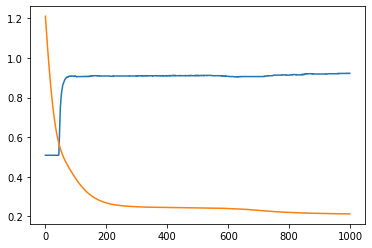

In [ ]:
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['loss'])

In [ ]:
layer1 = model1.get_layer('layer1')
weights1=layer1.get_weights()
print(weights1)

[array([[-0.18489838, -0.28722304],
       [ 1.8175958 , -4.2060857 ],
       [-2.0585337 , -0.5926528 ]], dtype=float32), array([-2.1859949,  0.3344365], dtype=float32)]


In [ ]:
x = np.linspace(-2, 2, 5)
y = x

#create grid points
X,Y = np.meshgrid(x,y)


print(y)
print(X,Y)

[-2. -1.  0.  1.  2.]
[[-2. -1.  0.  1.  2.]
 [-2. -1.  0.  1.  2.]
 [-2. -1.  0.  1.  2.]
 [-2. -1.  0.  1.  2.]
 [-2. -1.  0.  1.  2.]] [[-2. -2. -2. -2. -2.]
 [-1. -1. -1. -1. -1.]
 [ 0.  0.  0.  0.  0.]
 [ 1.  1.  1.  1.  1.]
 [ 2.  2.  2.  2.  2.]]


[[ 3.63288936  1.74092616 -0.15103704 -2.04300023 -3.93496343]
 [ 3.8904531   1.9984899   0.1065267  -1.7854365  -3.6773997 ]
 [ 4.14801683  2.25605363  0.36409044 -1.52787276 -3.41983596]
 [ 4.40558057  2.51361737  0.62165417 -1.27030903 -3.16227223]
 [ 4.6631443   2.7711811   0.87921791 -1.01274529 -2.90470849]]


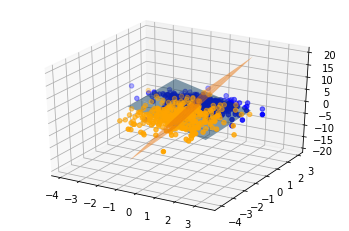

In [ ]:
ax = plt.axes(projection='3d')



Z = (-1)*(-5.221966*X + 0.710896*Y + 1.004918)/(-2.760078)
Z2 = (-1)*(2.1394806*X + 0.15531926*Y + 0.0200836)/(-0.24012257)
print(Z)


ax.plot_surface(X,Y,Z, alpha=0.5)
ax.plot_surface(X,Y,Z2, alpha=0.5)
ax.scatter(c1[:,0],c1[:,1],c1[:,2],c='orange')
ax.scatter(c2[:,0],c2[:,1],c2[:,2],c='blue')

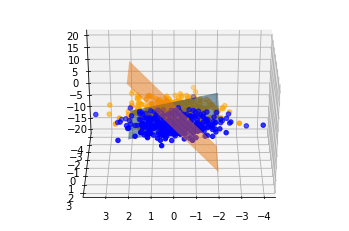

In [ ]:
ax = plt.axes(projection='3d')
ax.view_init(30,90)
ax.plot_surface(X,Y,Z, alpha=0.5)
ax.plot_surface(X,Y,Z2, alpha=0.5)
ax.scatter(c1[:,0],c1[:,1],c1[:,2],c='orange')
ax.scatter(c2[:,0],c2[:,1],c2[:,2],c='blue')


In [ ]:
tsne2 = TSNE(n_components=2, random_state=0)

In [ ]:
data1_t = tsne2.fit_transform(data1)

In [ ]:
c1 = data1_t[label1==0]
c2 = data1_t[label1==1]


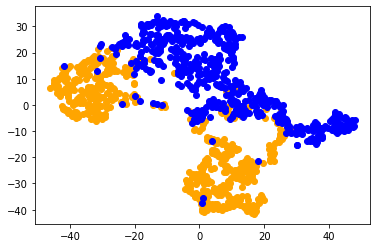

In [ ]:
plt.close()
plt.scatter(c1[:,0],c1[:,1],c='orange')
plt.scatter(c2[:,0],c2[:,1],c='b')

In [ ]:
print(X)
print(Y)
print(Z)
print(Z2)

[[-2. -1.  0.  1.  2.]
 [-2. -1.  0.  1.  2.]
 [-2. -1.  0.  1.  2.]
 [-2. -1.  0.  1.  2.]
 [-2. -1.  0.  1.  2.]]
[[-2. -2. -2. -2. -2.]
 [-1. -1. -1. -1. -1.]
 [ 0.  0.  0.  0.  0.]
 [ 1.  1.  1.  1.  1.]
 [ 2.  2.  2.  2.  2.]]
[[ 3.63288936  1.74092616 -0.15103704 -2.04300023 -3.93496343]
 [ 3.8904531   1.9984899   0.1065267  -1.7854365  -3.6773997 ]
 [ 4.14801683  2.25605363  0.36409044 -1.52787276 -3.41983596]
 [ 4.40558057  2.51361737  0.62165417 -1.27030903 -3.16227223]
 [ 4.6631443   2.7711811   0.87921791 -1.01274529 -2.90470849]]
[[-19.02993176 -10.11997964  -1.21002753   7.69992458  16.6098767 ]
 [-18.38309852  -9.4731464   -0.56319429   8.34675782  17.25670994]
 [-17.73626527  -8.82631316   0.08363895   8.99359106  17.90354318]
 [-17.08943203  -8.17947992   0.73047219   9.6404243   18.55037642]
 [-16.44259879  -7.53264668   1.37730543  10.28725755  19.19720966]]


In [ ]:
print(data1[:5])

[[-1.31787973e+00  1.75160958e+00  9.66191401e-01]
 [-6.95864351e-01  1.51151577e+00  7.46055478e-04]
 [-1.07896592e-02 -8.22526488e-01 -9.43947055e-01]
 [ 1.11490226e+00  1.03315072e+00 -1.30893268e+00]
 [ 1.27388560e+00  1.23564735e+00 -1.46127890e+00]]


In [ ]:
print(X.shape)

(5, 5)


In [ ]:
X = X.flatten()
print(X)
print(X.shape)
#X = np.array([X]).T
print(X)
print(X.shape)


[-2. -1.  0.  1.  2. -2. -1.  0.  1.  2. -2. -1.  0.  1.  2. -2. -1.  0.
  1.  2. -2. -1.  0.  1.  2.]
(25,)
[-2. -1.  0.  1.  2. -2. -1.  0.  1.  2. -2. -1.  0.  1.  2. -2. -1.  0.
  1.  2. -2. -1.  0.  1.  2.]
(25,)


In [ ]:
Y= Y.flatten()
#Y = np.array([Y]).T
Z=Z.flatten()
#Z = np.array([Z]).T
Z2 = Z2.flatten()
#Z2 = np.array([Z2]).T

In [ ]:
plane1_data = np.dstack((X,Y,Z))



print(plane1_data[:5])


[[[-2.         -2.          3.63288936]
  [-1.         -2.          1.74092616]
  [ 0.         -2.         -0.15103704]
  [ 1.         -2.         -2.04300023]
  [ 2.         -2.         -3.93496343]
  [-2.         -1.          3.8904531 ]
  [-1.         -1.          1.9984899 ]
  [ 0.         -1.          0.1065267 ]
  [ 1.         -1.         -1.7854365 ]
  [ 2.         -1.         -3.6773997 ]
  [-2.          0.          4.14801683]
  [-1.          0.          2.25605363]
  [ 0.          0.          0.36409044]
  [ 1.          0.         -1.52787276]
  [ 2.          0.         -3.41983596]
  [-2.          1.          4.40558057]
  [-1.          1.          2.51361737]
  [ 0.          1.          0.62165417]
  [ 1.          1.         -1.27030903]
  [ 2.          1.         -3.16227223]
  [-2.          2.          4.6631443 ]
  [-1.          2.          2.7711811 ]
  [ 0.          2.          0.87921791]
  [ 1.          2.         -1.01274529]
  [ 2.          2.         -2.90470849]]

In [ ]:
print(plane1_data.shape)
plane1_data = plane1_data[0]
print(plane1_data.shape)

(1, 25, 3)
(25, 3)


In [ ]:
plane1_data_t = tsne2.fit_transform(plane1_data)


In [ ]:
print(plane1_data_t)

[[-31.058315    29.500683  ]
 [-21.461353   -17.4364    ]
 [ -6.0965753  -39.141697  ]
 [ 56.07161     -9.400822  ]
 [ 61.351185   -56.833744  ]
 [ 17.821402    57.41361   ]
 [ 49.250862    50.355305  ]
 [-13.172927    53.61875   ]
 [ 31.702734   -64.52069   ]
 [ 14.361623     7.5076756 ]
 [ 29.184048   -13.613249  ]
 [ 19.284979   -39.02389   ]
 [  4.3560157  -15.153996  ]
 [-12.708655     6.6761494 ]
 [-46.88461    -28.260098  ]
 [-28.764826   -54.79959   ]
 [ 62.6004      25.238491  ]
 [-43.313934     3.2241855 ]
 [ 44.929      -34.219784  ]
 [ 81.61157      3.9219413 ]
 [  0.79821765  29.447706  ]
 [  2.0514188  -67.21559   ]
 [ 27.693497    31.413803  ]
 [ 40.47025      9.942824  ]
 [ 76.766655   -28.811687  ]]


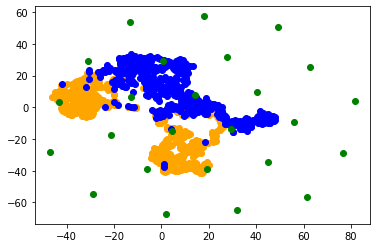

In [ ]:
plt.close()
plt.scatter(c1[:,0],c1[:,1],c='orange')
plt.scatter(c2[:,0],c2[:,1],c='b')
plt.scatter(plane1_data_t[:,0],plane1_data_t[:,1],c='green')

In [ ]:
plane2_data = np.dstack((X,Y,Z2))
print(plane2_data.shape)

(1, 25, 3)


In [ ]:
plane2_data=plane2_data[0]

In [ ]:
plane2_data_t = tsne2.fit_transform(plane2_data)


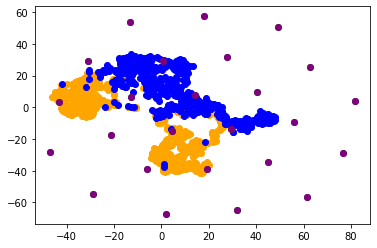

In [ ]:
plt.close()
plt.scatter(c1[:,0],c1[:,1],c='orange')
plt.scatter(c2[:,0],c2[:,1],c='b')
plt.scatter(plane1_data_t[:,0],plane1_data_t[:,1],c='green')
plt.scatter(plane2_data_t[:,0],plane2_data_t[:,1],c='purple')

In [ ]:
tsne2 = TSNE(n_components=2, random_state=0, angle=0.2)
data1_t = tsne2.fit_transform(data1)

plane1_data_t = tsne2.fit_transform(plane1_data)
plane2_data_t = tsne2.fit_transform(plane2_data)


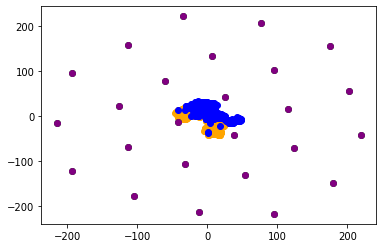

In [ ]:
plt.close()
plt.scatter(c1[:,0],c1[:,1],c='orange')
plt.scatter(c2[:,0],c2[:,1],c='b')
plt.scatter(plane1_data_t[:,0],plane1_data_t[:,1],c='green')
plt.scatter(plane2_data_t[:,0],plane2_data_t[:,1],c='purple')